# Task 4
# Akhilkumar K S
# ID: SIRSS2138

## Titanic EDA

#### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Data

In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.shape

(891, 12)

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking null values

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### droping "Cabin" because of high null values

In [8]:
data.drop('Cabin',axis=1,inplace=True)

#### Filling null values of "Age" with mean value

In [10]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

#### Filling null values of Embarked with mode

In [14]:
mod_Emb=data['Embarked'].dropna().mode()[0]
print(mod_Emb)


S


In [15]:
data['Embarked'].fillna(mod_Emb,inplace=True)

In [16]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Data Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

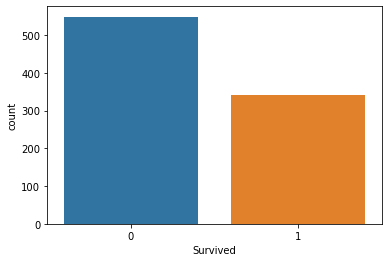

In [17]:
sns.countplot(x="Survived",data=data)

lesser number of people survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

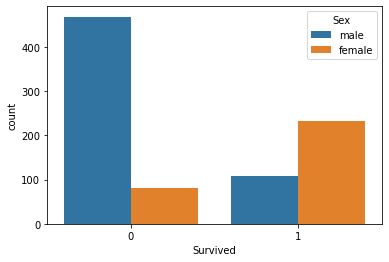

In [20]:
sns.countplot(x="Survived",hue="Sex",data=train)

women survived than men

In [40]:
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [97]:
female=data.loc[data["Sex"]=="female","Survived"]
print('women survived : {}%'.format(sum(female)*100/len(female)))

women survived : 74.20382165605096%


In [98]:
male=data.loc[data["Sex"]=="male","Survived"]
print('men survived : {}%'.format(sum(male)*100/len(male)))

men survived : 18.890814558058924%


<AxesSubplot:xlabel='Pclass', ylabel='count'>

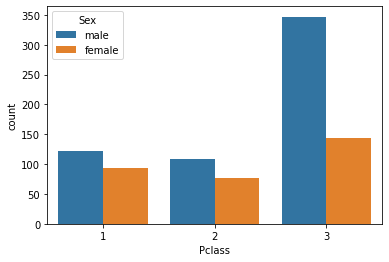

In [107]:
sns.countplot(x="Pclass",data=data,hue="Sex")

In [108]:
for i in range(1,4):
    cls=data.loc[data.Pclass==i,"Survived"]
    print("{} class survivors : {} %".format(i,sum(cls)*100/len(cls)))

1 class survivors : 62.96296296296296 %
2 class survivors : 47.28260869565217 %
3 class survivors : 24.236252545824847 %


1st class passengers survived more 

<AxesSubplot:xlabel='Survived', ylabel='count'>

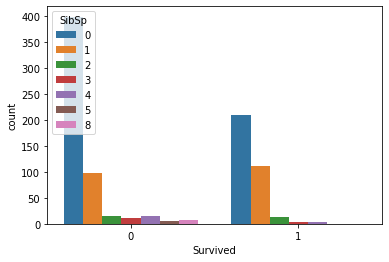

In [38]:
sns.countplot(x = 'Survived', hue = 'SibSp', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

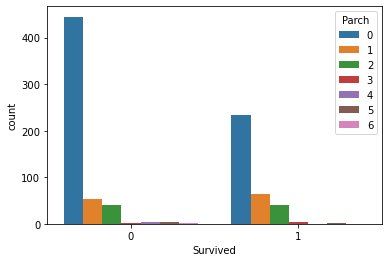

In [40]:
sns.countplot(x = 'Survived', hue = 'Parch', data = train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

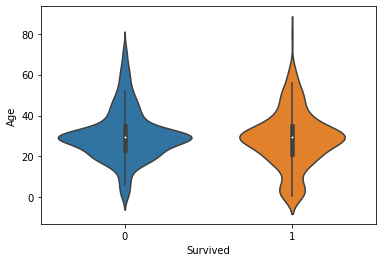

In [42]:
sns.violinplot(x = 'Survived', y = 'Age', data = train)

Young, between 20 and 40 survived more

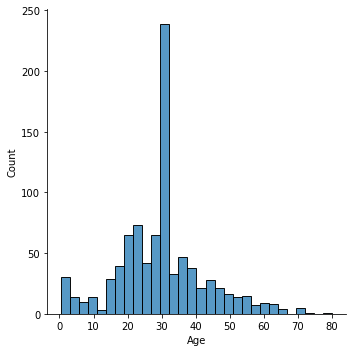

In [133]:
sns.displot(data['Age'])

<AxesSubplot:>

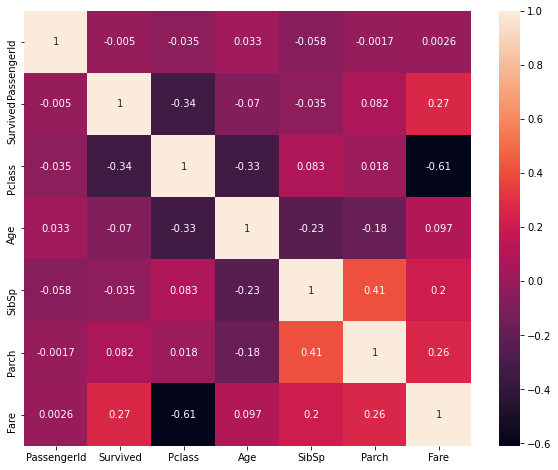

In [128]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

Fare and Pclass is highly correlated to Survival